# Transformada de Fourier de tiempo corto (STFT)

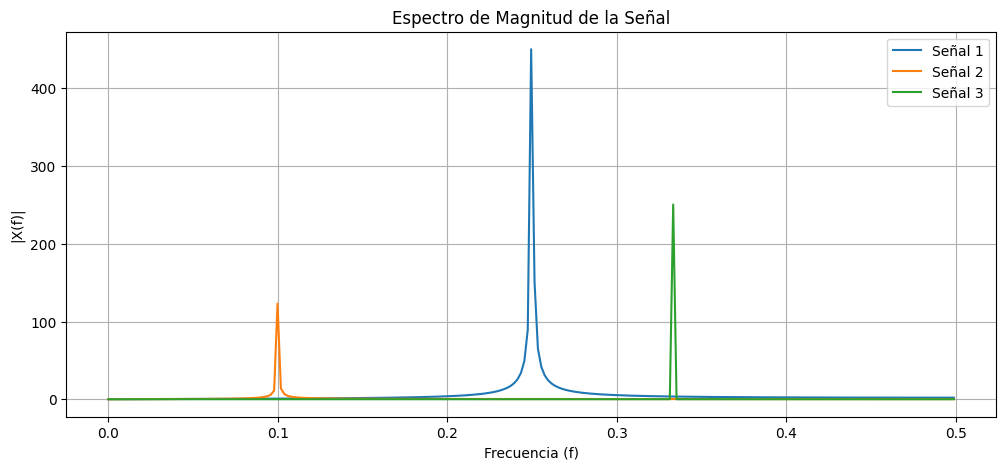

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# tiempo t
t = np.arange(0, 501)

# señales x1, x2 y x3
x1 = 2 * np.sin(2 * np.pi * (1/4) * t)
x2 = 0.5 * np.sin(2 * np.pi * (1/10) * t)
x3 = np.sin(2 * np.pi * (1/3) * t)

# Combinamos las señales en una matriz
x = np.column_stack((x1, x2, x3))

# Aplicamos la FFT y obtenemos el espectro de magnitud
X = np.fft.fft(x, axis=0)
magnitude = np.abs(X)

# Calculamos las frecuencias correspondientes
N = len(t)
freqs = np.fft.fftfreq(N)

# Filtramos las frecuencias y magnitudes para mostrar solo de 0 a 0.5
indices = np.where((freqs >= 0) & (freqs <= 0.5))
freqs_filtered = freqs[indices]
magnitude_filtered = magnitude[indices]

# Graficamos el espectro de magnitud
plt.figure(figsize=(12, 5))
for i in range(x.shape[1]):
    plt.plot(freqs_filtered, magnitude_filtered[:, i], label=f'Señal {i+1}')

plt.xlabel('Frecuencia (f)')
plt.ylabel('|X(f)|')
plt.title('Espectro de Magnitud de la Señal')
plt.legend()
plt.grid(True)
plt.show()


# Espectrograma

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# tiempo t
t = np.arange(0, 501)

# señales x1, x2 y x3
x1 = 2 * np.sin(2 * np.pi * (1/4) * t)
x2 = 0.5 * np.sin(2 * np.pi * (1/10) * t)
x3 = np.sin(2 * np.pi * (1/3) * t)

# Combinamos las señales en una sola señal sumada
x_combined = x1 + x2 + x3

# Aplicamos la STFT
f, t, Zxx = stft(x_combined, fs=1.0, nperseg=128)

# Preparamos los datos para el gráfico 3D
T, F = np.meshgrid(t, f)
Z = np.abs(Zxx)

# Función para graficar el espectrograma en 3D
def plot_spectrogram_3d(elev, azim):
    fig = plt.figure(figsize=(14, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(T, F, Z, cmap='viridis')
    ax.set_title('Espectrograma 3D de la Señal X')
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Frecuencia [Hz]')
    ax.set_zlabel('Amplitud')
    ax.view_init(elev=elev, azim=azim)
    
    # Graficamos el espectrograma en 2D
    ax2 = fig.add_subplot(122)
    pcm = ax2.pcolormesh(t, f, Z, shading='gouraud', cmap='viridis')
    ax2.set_title('Espectrograma de la Señal X')
    ax2.set_ylabel('Frecuencia [Hz]')
    ax2.set_xlabel('Tiempo [s]')
    fig.colorbar(pcm, ax=ax2, label='Amplitud')
    
    plt.show()

# Widgets para controlar la vista del gráfico 3D
elev_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Elevación')
azim_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=-60, description='Azimut')

# Actualizar la gráfica cuando se cambien los valores de los sliders
interactive_plot = widgets.interactive_output(plot_spectrogram_3d, {'elev': elev_slider, 'azim': azim_slider})

# Mostrar los widgets y la gráfica
display(widgets.HBox([elev_slider, azim_slider]), interactive_plot)


Output()

# Análisis con diferentes señales

## Generar señales

In [49]:
import json
import numpy as np

# Definir el tiempo t
fs = 400  # frecuencia de muestreo (400 Hz)
t = np.linspace(0, 20, 20 * fs, endpoint=False)

# Generar la señal x(t) con diferentes frecuencias en diferentes intervalos
signal = np.piecewise(t, [t < 5, (t >= 5) & (t < 10), (t >= 10) & (t < 15), t >= 15],
                      [lambda t: np.cos(2 * np.pi * 10 * t),
                       lambda t: np.cos(2 * np.pi * 25 * t),
                       lambda t: np.cos(2 * np.pi * 50 * t),
                       lambda t: np.cos(2 * np.pi * 100 * t)])

# Crear el diccionario con la señal
signals = {
    "signal": signal.tolist()
}

# Guardar la señal en un archivo JSON
with open('signals.json', 'w') as f:
    json.dump(signals, f)


In [53]:
import json
import numpy as np

# Definir el tiempo t
t = np.arange(0, 501)

# Generar las señales
x1 = 2 * np.sin(2 * np.pi * (1/4) * t)
x2 = 0.5 * np.sin(2 * np.pi * (1/10) * t)
x3 = np.sin(2 * np.pi * (1/3) * t)

# Crear el diccionario con las señales
signals = {
    "x1": x1.tolist(),
    "x2": x2.tolist(),
    "x3": x3.tolist()
}

# Guardar las señales en un archivo JSON
with open('signals.json', 'w') as f:
    json.dump(signals, f)


## Run 

Output()

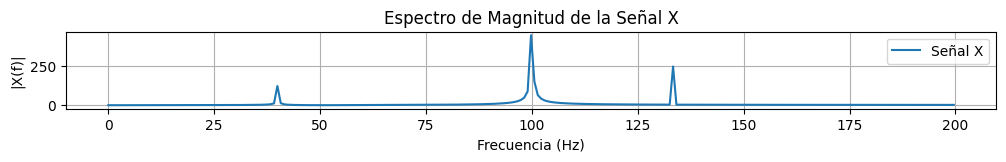

In [54]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Función para leer señales desde un archivo JSON
def read_signals_from_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    signals = {key: np.array(value) for key, value in data.items()}
    return signals

# Leer señales desde el archivo JSON
file_path = 'signals.json'
signals = read_signals_from_json(file_path)

# Combinar las señales
x_combined = sum(signals.values())

# Aplicamos la STFT
fs = 400  # frecuencia de muestreo
f, t, Zxx = stft(x_combined, fs=fs, nperseg=128)

# Preparamos los datos para el gráfico 3D
T, F = np.meshgrid(t, f)
Z = np.abs(Zxx)

# Función para graficar el espectrograma en 3D
def plot_spectrogram_3d(elev, azim):
    fig = plt.figure(figsize=(14, 3))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(T, F, Z, cmap='viridis')
    ax.set_title('Espectrograma 3D de la Señal X')
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Frecuencia [Hz]')
    ax.set_zlabel('Amplitud')
    ax.view_init(elev=elev, azim=azim)
    
    # Graficamos el espectrograma en 2D
    ax2 = fig.add_subplot(122)
    pcm = ax2.pcolormesh(t, f, Z, shading='gouraud', cmap='viridis')
    ax2.set_title('Espectrograma de la Señal X')
    ax2.set_ylabel('Frecuencia [Hz]')
    ax2.set_xlabel('Tiempo [s]')
    fig.colorbar(pcm, ax=ax2, label='Amplitud')
    
    plt.show()

# Widgets para controlar la vista del gráfico 3D
elev_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Elevación')
azim_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=-60, description='Azimut')

# Actualizar la gráfica cuando se cambien los valores de los sliders
interactive_plot = widgets.interactive_output(plot_spectrogram_3d, {'elev': elev_slider, 'azim': azim_slider})

# Mostrar los widgets y la gráfica
display(widgets.HBox([elev_slider, azim_slider]), interactive_plot)

# Graficar el espectro en frecuencia
X = np.fft.fft(x_combined)
magnitude = np.abs(X)
N = len(x_combined)
freqs = np.fft.fftfreq(N, d=1/fs)

# Filtrar las frecuencias y magnitudes para mostrar solo de 0 a 200 Hz
indices = np.where((freqs >= 0) & (freqs <= 200))
freqs_filtered = freqs[indices]
magnitude_filtered = magnitude[indices]

# Graficar el espectro de magnitud de la señal combinada
plt.figure(figsize=(12, 1))
plt.plot(freqs_filtered, magnitude_filtered, label='Señal X')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|X(f)|')
plt.title('Espectro de Magnitud de la Señal X')
plt.legend()
plt.grid(True)
plt.show()


# Análisis con la transformada Wavelet (WDT )

Output()

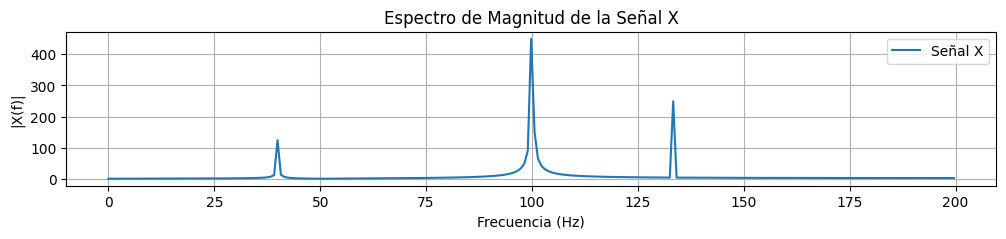

In [56]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pywt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Función para leer señales desde un archivo JSON
def read_signals_from_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    signals = {key: np.array(value) for key, value in data.items()}
    return signals

# Leer señales desde el archivo JSON
file_path = 'signals.json'  # Actualiza la ruta del archivo si es necesario
signals = read_signals_from_json(file_path)

# Combinar las señales
x_combined = sum(signals.values())

# Aplicamos la Transformada Wavelet
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(x_combined, scales, 'cmor', sampling_period=1/400)

# Preparamos los datos para el gráfico 3D
T, F = np.meshgrid(np.arange(x_combined.size) / 400, frequencies)
Z = np.abs(coefficients)

# Función para graficar el espectrograma en 3D
def plot_wavelet_3d(elev, azim):
    fig = plt.figure(figsize=(14, 3))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(T, F, Z, cmap='viridis')
    ax.set_title('Espectrograma Wavelet 3D de la Señal X')
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Frecuencia [Hz]')
    ax.set_zlabel('Amplitud')
    ax.view_init(elev=elev, azim=azim)
    
    # Graficamos el espectrograma en 2D
    ax2 = fig.add_subplot(122)
    pcm = ax2.pcolormesh(T, F, Z, shading='gouraud', cmap='viridis')
    ax2.set_title('Espectrograma Wavelet de la Señal X')
    ax2.set_ylabel('Frecuencia [Hz]')
    ax2.set_xlabel('Tiempo [s]')
    fig.colorbar(pcm, ax=ax2, label='Amplitud')
    
    plt.show()

# Widgets para controlar la vista del gráfico 3D
elev_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Elevación')
azim_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=-60, description='Azimut')

# Actualizar la gráfica cuando se cambien los valores de los sliders
interactive_plot = widgets.interactive_output(plot_wavelet_3d, {'elev': elev_slider, 'azim': azim_slider})

# Mostrar los widgets y la gráfica
display(widgets.HBox([elev_slider, azim_slider]), interactive_plot)

# Graficar el espectro en frecuencia
X = np.fft.fft(x_combined)
magnitude = np.abs(X)
N = len(x_combined)
freqs = np.fft.fftfreq(N, d=1/400)

# Filtrar las frecuencias y magnitudes para mostrar solo de 0 a 200 Hz
indices = np.where((freqs >= 0) & (freqs <= 200))
freqs_filtered = freqs[indices]
magnitude_filtered = magnitude[indices]

# Graficar el espectro de magnitud de la señal combinada
plt.figure(figsize=(12, 2))
plt.plot(freqs_filtered, magnitude_filtered, label='Señal X')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|X(f)|')
plt.title('Espectro de Magnitud de la Señal X')
plt.legend()
plt.grid(True)
plt.show()


## Diferencias entre la Transformada Wavelet (WT) y la Transformada de Fourier de Tiempo Corto (STFT)

### Resolución Tiempo-Frecuencia
- **STFT**: Usa una ventana de tiempo de tamaño fijo, lo que da una resolución constante en el tiempo y la frecuencia.
- **WT**: Utiliza ventanas de tamaño variable, proporcionando alta resolución temporal para componentes de alta frecuencia y alta resolución frecuencial para componentes de baja frecuencia.

### Ventana de Análisis
- **STFT**: La longitud de la ventana es fija y debe ser elegida de antemano.
- **WT**: No tiene una ventana fija; las wavelets se ajustan automáticamente para proporcionar una buena resolución tanto en tiempo como en frecuencia.

### Base de Transformación
- **STFT**: Utiliza funciones sinusoidales como base.
- **WT**: Utiliza funciones wavelet, como Morlet, Daubechies, y Haar, que son útiles para capturar transitorios y características locales de la señal.

### Adaptabilidad
- **STFT**: No es adaptable; la misma ventana se utiliza a lo largo de toda la señal.
- **WT**: Es adaptable; la wavelet se ajusta en tiempo y escala para adaptarse mejor a la naturaleza de la señal.

### Computación
- **STFT**: Generalmente más sencilla de computar e implementar.
- **WT**: Puede ser más compleja debido a la variedad de wavelets y la necesidad de calcular coeficientes en múltiples escalas.

### Interpretación
- **STFT**: Los resultados se interpretan en términos de espectrogramas.
- **WT**: Los resultados se interpretan en términos de coeficientes wavelet.

### Resumen
- La **STFT** es adecuada para señales casi estacionarias dentro de cada ventana de análisis, con resolución tiempo-frecuencia limitada por la ventana fija.
- La **WT** es más flexible y potente para analizar señales no estacionarias, proporcionando mejor resolución tiempo-frecuencia mediante el uso de ventanas adaptativas.



# Generación de la señal con cambios bruscos

Output()

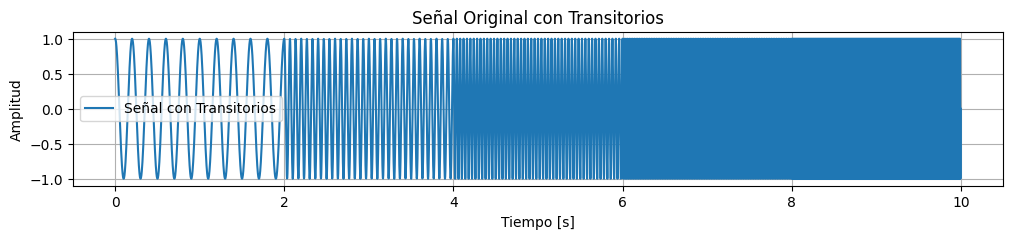

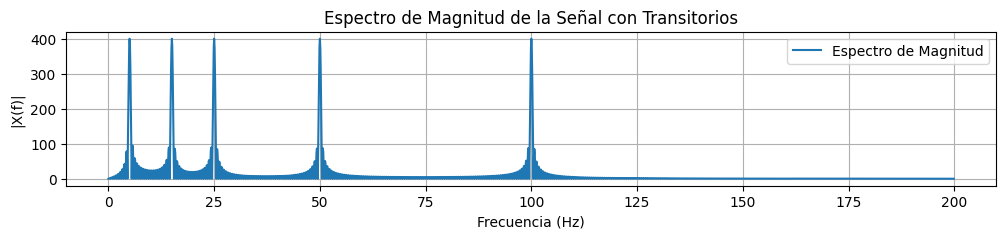

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Generar una señal con transitorios y cambios abruptos en frecuencia
fs = 400  # frecuencia de muestreo
t = np.linspace(0, 10, 10 * fs, endpoint=False)

# Crear una señal con cambios abruptos en frecuencia
signal = np.piecewise(t, [t < 2, (t >= 2) & (t < 4), (t >= 4) & (t < 6), (t >= 6) & (t < 8), t >= 8],
                      [lambda t: np.cos(2 * np.pi * 5 * t),
                       lambda t: np.cos(2 * np.pi * 15 * t),
                       lambda t: np.cos(2 * np.pi * 25 * t),
                       lambda t: np.cos(2 * np.pi * 50 * t),
                       lambda t: np.cos(2 * np.pi * 100 * t)])

# Aplicamos la Transformada Wavelet
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal, scales, 'cmor', sampling_period=1/fs)

# Preparamos los datos para el gráfico 3D
T, F = np.meshgrid(t, frequencies)
Z = np.abs(coefficients)

# Función para graficar el espectrograma en 3D
def plot_wavelet_3d(elev, azim):
    fig = plt.figure(figsize=(14, 3))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(T, F, Z, cmap='viridis')
    ax.set_title('Espectrograma Wavelet 3D de la Señal con Transitorios')
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Frecuencia [Hz]')
    ax.set_zlabel('Amplitud')
    ax.view_init(elev=elev, azim=azim)
    
    # Graficamos el espectrograma en 2D
    ax2 = fig.add_subplot(122)
    pcm = ax2.pcolormesh(T, F, Z, shading='gouraud', cmap='viridis')
    ax2.set_title('Espectrograma Wavelet de la Señal con Transitorios')
    ax2.set_ylabel('Frecuencia [Hz]')
    ax2.set_xlabel('Tiempo [s]')
    fig.colorbar(pcm, ax=ax2, label='Amplitud')
    
    plt.show()

# Widgets para controlar la vista del gráfico 3D
elev_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Elevación')
azim_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=-60, description='Azimut')

# Actualizar la gráfica cuando se cambien los valores de los sliders
interactive_plot = widgets.interactive_output(plot_wavelet_3d, {'elev': elev_slider, 'azim': azim_slider})

# Mostrar los widgets y la gráfica
display(widgets.HBox([elev_slider, azim_slider]), interactive_plot)

# Graficar la señal original
plt.figure(figsize=(12, 2))
plt.plot(t, signal, label='Señal con Transitorios')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Original con Transitorios')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el espectro en frecuencia
X = np.fft.fft(signal)
magnitude = np.abs(X)
N = len(signal)
freqs = np.fft.fftfreq(N, d=1/fs)

# Filtrar las frecuencias y magnitudes para mostrar solo de 0 a 200 Hz
indices = np.where((freqs >= 0) & (freqs <= 200))
freqs_filtered = freqs[indices]
magnitude_filtered = magnitude[indices]

plt.figure(figsize=(12, 2))
plt.plot(freqs_filtered, magnitude_filtered, label='Espectro de Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|X(f)|')
plt.title('Espectro de Magnitud de la Señal con Transitorios')
plt.legend()
plt.grid(True)
plt.show()


# STFT.

Output()

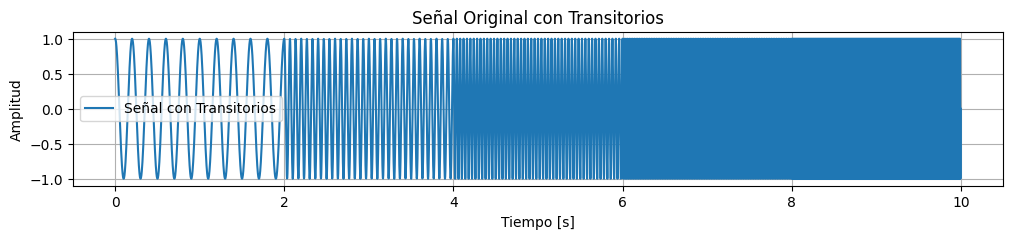

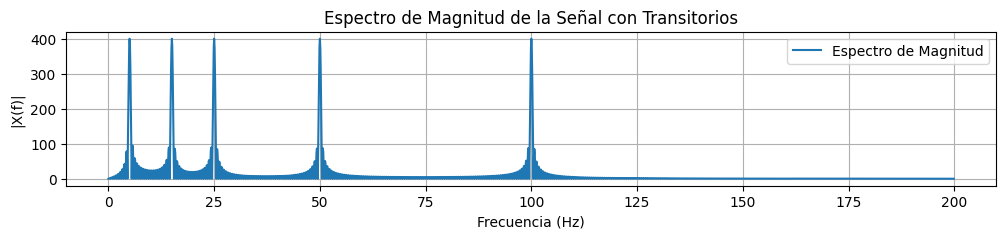

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Generar una señal con transitorios y cambios abruptos en frecuencia
fs = 400  # frecuencia de muestreo
t_signal = np.linspace(0, 10, 10 * fs, endpoint=False)

# Crear una señal con cambios abruptos en frecuencia
signal = np.piecewise(t_signal, [t_signal < 2, (t_signal >= 2) & (t_signal < 4), (t_signal >= 4) & (t_signal < 6), (t_signal >= 6) & (t_signal < 8), t_signal >= 8],
                      [lambda t: np.cos(2 * np.pi * 5 * t),
                       lambda t: np.cos(2 * np.pi * 15 * t),
                       lambda t: np.cos(2 * np.pi * 25 * t),
                       lambda t: np.cos(2 * np.pi * 50 * t),
                       lambda t: np.cos(2 * np.pi * 100 * t)])

# Aplicamos la STFT
f, t_stft, Zxx = stft(signal, fs=fs, nperseg=256)

# Preparamos los datos para el gráfico 3D
T, F = np.meshgrid(t_stft, f)
Z = np.abs(Zxx)

# Función para graficar el espectrograma en 3D
def plot_stft_3d(elev, azim):
    fig = plt.figure(figsize=(14, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(T, F, Z, cmap='viridis')
    ax.set_title('Espectrograma STFT 3D de la Señal con Transitorios')
    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Frecuencia [Hz]')
    ax.set_zlabel('Amplitud')
    ax.view_init(elev=elev, azim=azim)
    
    # Graficamos el espectrograma en 2D
    ax2 = fig.add_subplot(122)
    pcm = ax2.pcolormesh(T, F, Z, shading='gouraud', cmap='viridis')
    ax2.set_title('Espectrograma STFT de la Señal con Transitorios')
    ax2.set_ylabel('Frecuencia [Hz]')
    ax2.set_xlabel('Tiempo [s]')
    fig.colorbar(pcm, ax=ax2, label='Amplitud')
    
    plt.show()

# Widgets para controlar la vista del gráfico 3D
elev_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Elevación')
azim_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=-60, description='Azimut')

# Actualizar la gráfica cuando se cambien los valores de los sliders
interactive_plot = widgets.interactive_output(plot_stft_3d, {'elev': elev_slider, 'azim': azim_slider})

# Mostrar los widgets y la gráfica
display(widgets.HBox([elev_slider, azim_slider]), interactive_plot)

# Graficar la señal original
plt.figure(figsize=(12, 2))
plt.plot(t_signal, signal, label='Señal con Transitorios')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Original con Transitorios')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el espectro en frecuencia
X = np.fft.fft(signal)
magnitude = np.abs(X)
N = len(signal)
freqs = np.fft.fftfreq(N, d=1/fs)

# Filtrar las frecuencias y magnitudes para mostrar solo de 0 a 200 Hz
indices = np.where((freqs >= 0) & (freqs <= 200))
freqs_filtered = freqs[indices]
magnitude_filtered = magnitude[indices]

plt.figure(figsize=(12, 2))
plt.plot(freqs_filtered, magnitude_filtered, label='Espectro de Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|X(f)|')
plt.title('Espectro de Magnitud de la Señal con Transitorios')
plt.legend()
plt.grid(True)
plt.show()
